In [1]:
import json
from collections import defaultdict
page_sampling_time = defaultdict(list)
row_sampling_time = defaultdict(list)
shuffle_time =  defaultdict(list)
with open("results-dsb.jsonl") as f:
    for line in f:
        res = json.loads(line)
        mode = res["mode"]
        if mode == "page":
            page_sampling_time[res["sample_rate"]].append(res["time"])
        elif mode == "row":
            row_sampling_time[res["sample_rate"]].append(res["time"])
        elif mode == "shuffle":
            shuffle_time[res["sample_rate"]*100].append(res["time"])


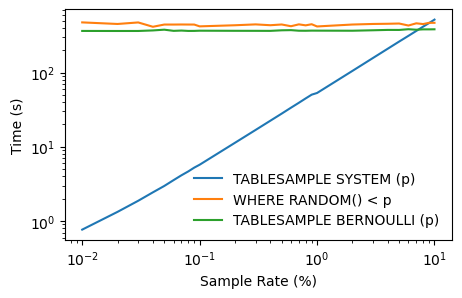

In [2]:
import matplotlib.pyplot as plt
page_sampling_x = [x for x in list(page_sampling_time.keys()) if x <= 10]
page_sampling_y = [sum(page_sampling_time[x])/len(page_sampling_time[x]) for x in page_sampling_x]
row_sampling_x = [x for x in list(row_sampling_time.keys()) if x <= 10]
row_sampling_y = [sum(row_sampling_time[x])/len(row_sampling_time[x]) for x in row_sampling_x]
shuffle_x = [x for x in list(shuffle_time.keys()) if x <= 10]
shuffle_y = [sum(shuffle_time[x])/len(shuffle_time[x]) for x in shuffle_x]

plt.figure(figsize=(5, 3))
plt.plot(page_sampling_x, page_sampling_y, label="TABLESAMPLE SYSTEM (p)")
plt.plot(shuffle_x, shuffle_y, label="WHERE RANDOM() < p")
plt.plot(row_sampling_x, row_sampling_y, label="TABLESAMPLE BERNOULLI (p)")
plt.xlabel("Sample Rate (%)")
plt.ylabel("Time (s)")
plt.legend(frameon=False)
plt.xscale("log")
plt.yscale("log")
plt.savefig("tablesample.pdf", bbox_inches='tight')
plt.show()

In [5]:
gt = 271.68669930292276
page_sampling_error = defaultdict(list)
row_sampling_error = defaultdict(list)
shuffle_error =  defaultdict(list)
with open("results-dsb.jsonl") as f:
    for line in f:
        res = json.loads(line)
        mode = res["mode"]
        error = abs(res["avg"] - gt) / gt * 100
        if mode == "page":
            page_sampling_error[res["sample_rate"]].append(error)
        elif mode == "row":
            row_sampling_error[res["sample_rate"]].append(error)
        elif mode == "shuffle":
            shuffle_error[res["sample_rate"]*100].append(error)

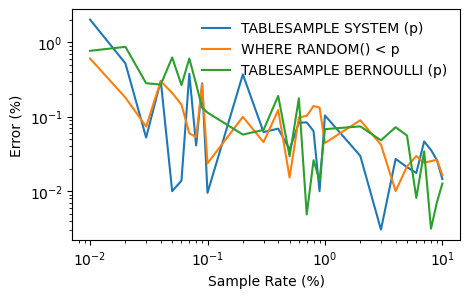

In [6]:
import matplotlib.pyplot as plt
page_sampling_x = [x for x in list(page_sampling_error.keys()) if x <= 10]
page_sampling_y = [sum(page_sampling_error[x])/len(page_sampling_error[x]) for x in page_sampling_x]
row_sampling_x = [x for x in list(row_sampling_error.keys()) if x <= 10]
row_sampling_y = [sum(row_sampling_error[x])/len(row_sampling_error[x]) for x in row_sampling_x]
shuffle_x = [x for x in list(shuffle_time.keys()) if x <= 10]
shuffle_y = [sum(shuffle_error[x])/len(shuffle_error[x]) for x in shuffle_x]

plt.figure(figsize=(5, 3))
plt.plot(page_sampling_x, page_sampling_y, label="TABLESAMPLE SYSTEM (p)")
plt.plot(shuffle_x, shuffle_y, label="WHERE RANDOM() < p")
plt.plot(row_sampling_x, row_sampling_y, label="TABLESAMPLE BERNOULLI (p)")
plt.xlabel("Sample Rate (%)")
plt.ylabel("Error (%)")
plt.legend(frameon=False)
plt.xscale("log")
plt.yscale("log")
# plt.savefig("tablesample.pdf", bbox_inches='tight')
plt.show()